# Orbitales $s$, $p$ e hibridación $sp^2$

<div align="right">Por David A. Miranda, PhD<br>2019</div>
<br>
Sea un átomo hidrogenóide, entonces, la función de onda que describe un orbital con números cuánticos $n, l, m_l$ está dada por,

$\Psi_{nlm_l}(r, \theta, \phi) = \sqrt{\left( \frac{2}{n a_0^*} \right)^3 \frac{(n-l-1)!}{2n(n+l)!}}
   e^{-r / na_0^*}
   \left( \frac{2r}{na_0^*} \right)^l
   L_{n-l-1}^{2l+1}\left( \frac{2r}{na_0^*} \right)
   Y_{l}^{m}(\theta, \phi)$

Donde, 
+ $a_0^* = \frac{4\pi \epsilon_0 \hbar^2}{\mu q_e^2}$ es el radio reducido de Bohr.

In [1]:
from scipy.special import sph_harm as Y
from scipy.special import eval_genlaguerre as L
from scipy import constants as cte
import numpy as np

a = 4 * np.pi * cte.epsilon_0 * cte.hbar**2/(cte.m_e * cte.e **2) # radio de Bohr

theta = np.linspace(0, np.pi  , 100)
phi   = np.linspace(0, 2*np.pi, 100)
r     = np.linspace(0, 8*a    , 100)

fact  = lambda N: np.prod([n for n in range(1, N+1)])
norma = lambda n, l: np.sqrt( (2/(n*a))**3*fact(n-l-1)/(2*n*fact(n+l))) 

def orbital(n, l, m_l, r=r, theta=theta, phi=phi):
    rho = lambda n: 2*r/(n*a)
    Rnl = np.exp(-rho(n)/2)*rho(n)**l
    Lnl = L(n-l-1, 2*l+1, rho(n))
    Ylm = Y(m_l, l, theta, phi)
    return norma(n,l)*Rnl*Lnl*Ylm

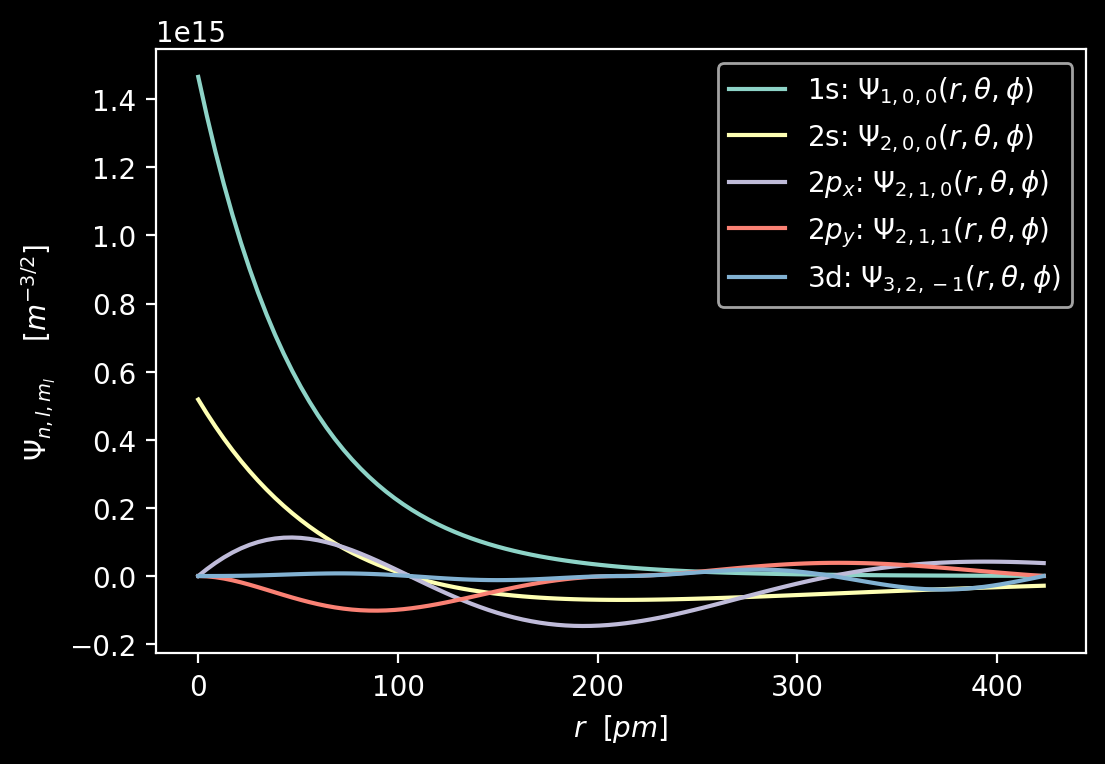

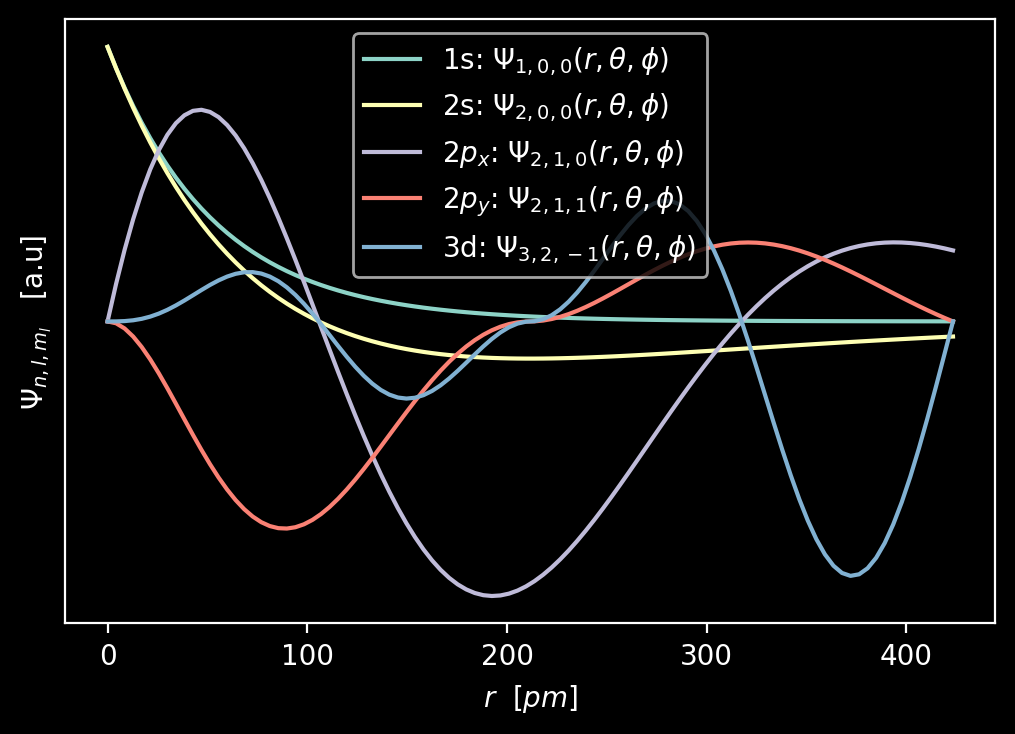

In [2]:
import matplotlib.pyplot as plt

orbital_def = { # (n, l, m_l)
    '1s': (1, 0, 0),
    '2s': (2, 0, 0),
    r'$2p_x$': (2, 1, 0),
    r'$2p_y$': (2, 1, 1),
    '3d': (3, 2, -1)
    }

fig1 = plt.figure(1, dpi=200)
fig2 = plt.figure(2, dpi=200)
figs = [fig1, fig2]
for o in orbital_def.keys():
    n, l, m_l = orbital_def[o]
    orb = orbital(n, l, m_l)
    factor = [1, 1/np.abs(orb).max()]
    for f in range(2):
        plt.figure(f+1)
        plt.plot(1e12*r, factor[f]*orb.real, label=r'%s: $\Psi_{%d,%d, %d}(r, \theta, \phi)$' %(o, n, l, m_l))

plt.figure(1)
plt.xlabel(r'$r$  $[pm]$')
plt.ylabel(r'$\Psi_{n, l, m_l }$    $[m^{-3/2}]$')
plt.legend()

plt.figure(2)
plt.xlabel(r'$r$  $[pm]$')
plt.ylabel(r'$\Psi_{n, l, m_l }$   [a.u]')
plt.yticks([])
plt.legend()
plt.show()

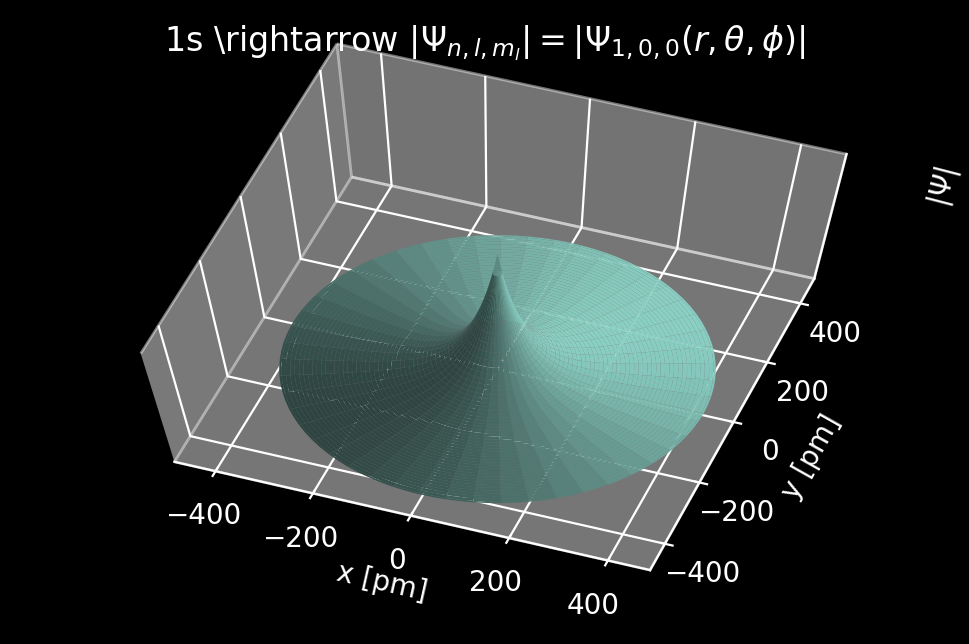

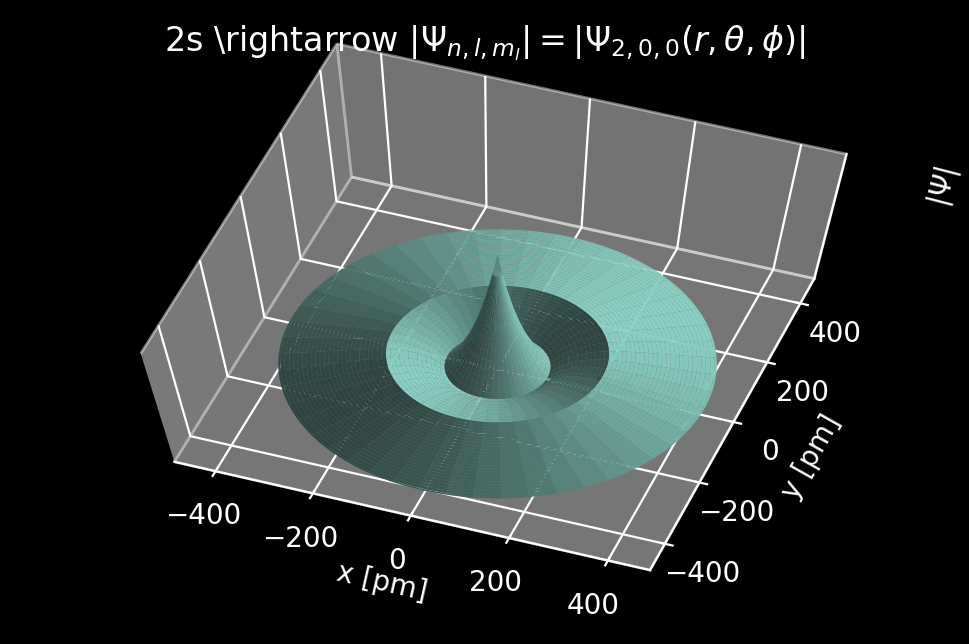

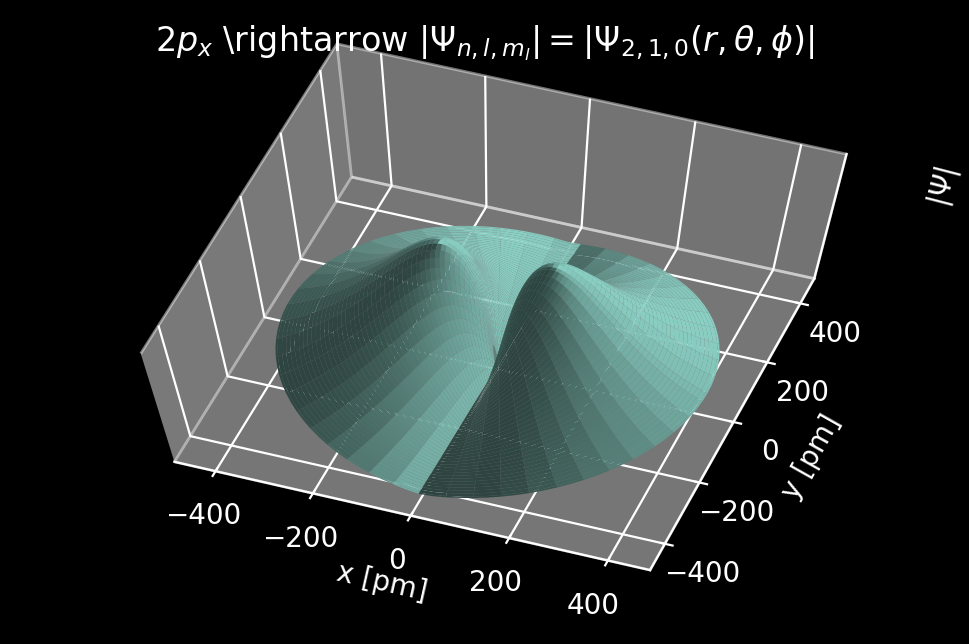

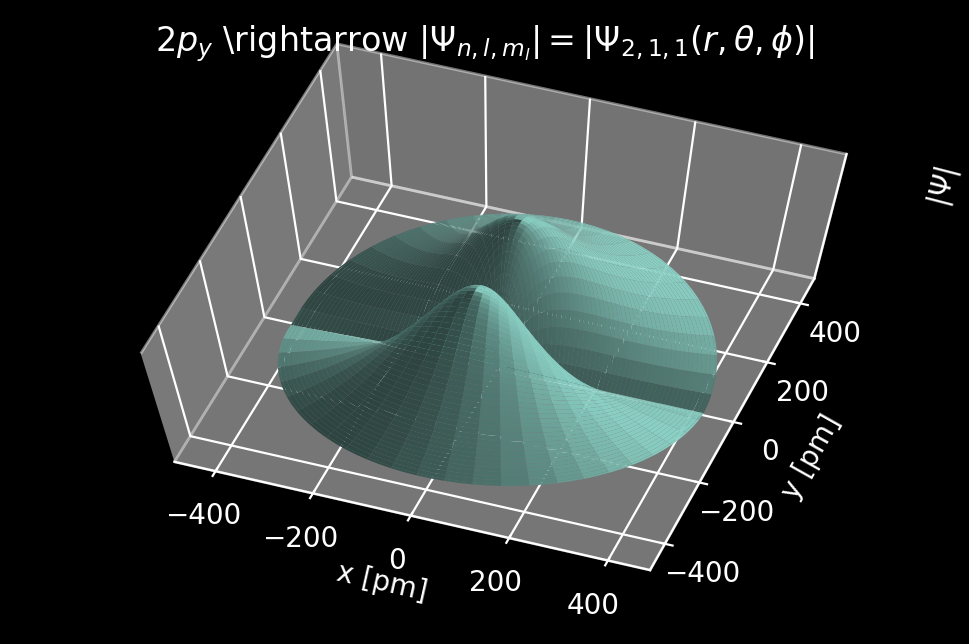

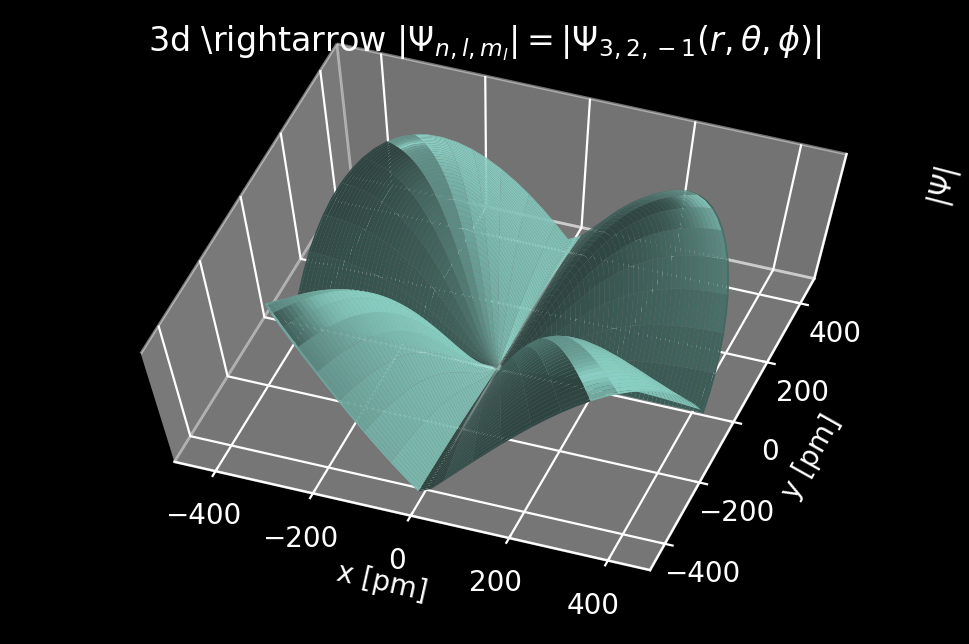

In [3]:
from mpl_toolkits.mplot3d import Axes3D

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

phi2D, r2D = np.meshgrid(phi, r)
theta2D = np.pi/2*np.ones(r.shape)

x2D = r2D*np.sin(theta2D)*np.cos(phi2D)
y2D = r2D*np.sin(theta2D)*np.sin(phi2D)
z2D = r2D*np.cos(theta2D)

for o in orbital_def.keys():
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(111, projection='3d')
    n, l, m_l = orbital_def[o]
    orb2D = orbital(n, l, m_l, r=r2D, theta=theta2D, phi=phi2D)
    orb = orbital(n, l, m_l)
    img = ax.plot_surface(1e12*x2D, 1e12*y2D, np.abs(orb2D))
    ax.set_xlabel('x [pm]')
    ax.set_ylabel('y [pm]')
    ax.set_zlabel(r'$|\Psi|$')
    ax.set_zticks([])
    plt.title(r'%s \rightarrow $|\Psi_{n,l,m_l}|=|\Psi_{%d,%d, %d}(r, \theta, \phi)|$' %(o, n, l, m_l))
    ax.view_init(elev=70, azim=-70)

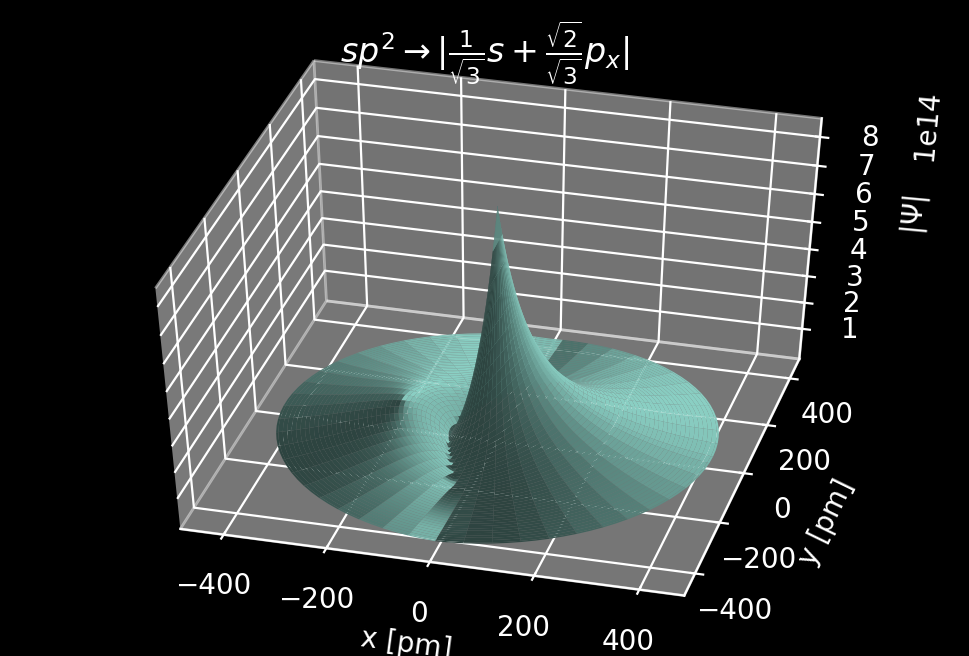

In [4]:
s_label = '1s'
p_label = r'$2p_x$'

n, l, m_l = orbital_def[s_label]
orb_s2D = orbital(n, l, m_l, r=r2D, theta=theta2D, phi=phi2D)

n, l, m_l = orbital_def[p_label]
orb_p2D = orbital(n, l, m_l, r=r2D, theta=theta2D, phi=phi2D)

sp2 = np.sqrt(1/3)*orb_s2D + np.sqrt(2/3)*orb_p2D

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
img = ax.plot_surface(1e12*x2D, 1e12*y2D, np.abs(sp2))
ax.set_xlabel('x [pm]')
ax.set_ylabel('y [pm]')
ax.set_zlabel(r'$|\Psi|$')
plt.title(r'$sp^2 \rightarrow \left|{\frac{1}{\sqrt{3}}s + \frac{\sqrt{2}}{\sqrt{3}}p_x}\right|$')
ax.view_init(elev=45, azim=-75)

End! By the moment.